In [303]:
#import modules and packages
from imutils.perspective import four_point_transform
from imutils import contours
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

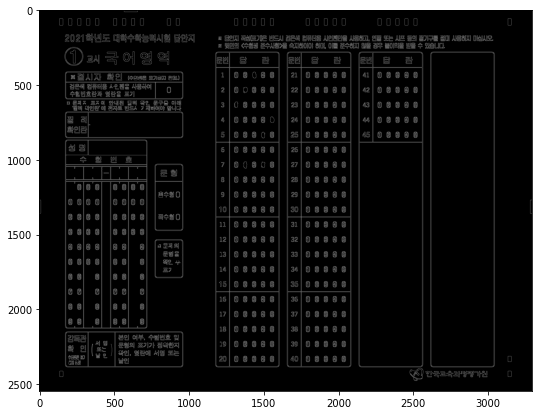

In [304]:
#load the image and preprocess
plt.rcParams["figure.figsize"] = (12,7)
img=cv2.imread('a.png',cv2.IMREAD_COLOR)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged=cv2.Canny(blurred, 50, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [305]:
#finding contours
cnts=cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)


[array([[[ 184,  868]],

       [[ 176, 2116]],

       [[ 711, 2126]],

       [[ 721,  876]]]), array([[[1191,  280]],

       [[1178, 2370]],

       [[1590, 2385]],

       [[1606,  294]]]), array([[[1675,  279]],

       [[1657, 2369]],

       [[2069, 2385]],

       [[2085,  293]]]), array([[[2155,  279]],

       [[2136, 2368]],

       [[2549, 2385]],

       [[2565,  297]]]), array([[[2634,  279]],

       [[2615, 2367]],

       [[3028, 2385]],

       [[3044,  296]]])]


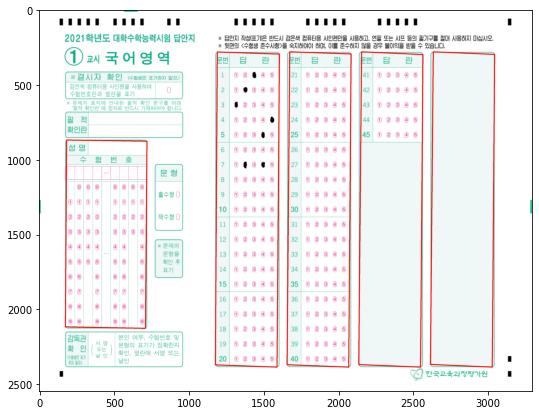

In [306]:
#reducing vertices by approxPolyDP, finding answer area
roa=np.empty((0,1,2), int) #(region of answer)ndarray gen
for c in cnts: 
    peri=cv2.arcLength(c, True) 
    approx=cv2.approxPolyDP(c, 0.005*peri, True)
    if len(approx)==4:
        cv2.drawContours(img, [approx], 0, (0, 0, 255), 5)
        roa=np.append(roa, approx, axis=0) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
roa=roa.reshape(5,4,1,2)
roa=sorted(roa, key=lambda roa:roa[0][0][0], reverse=False)
print(roa)

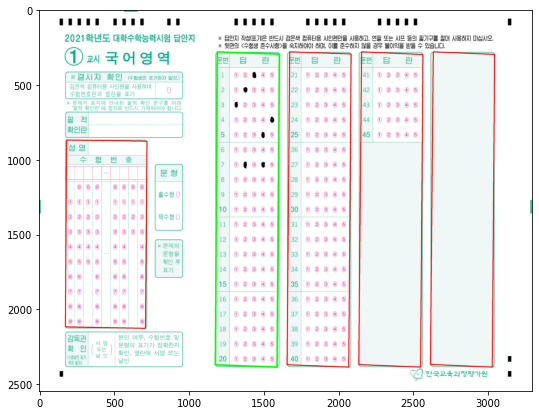

In [307]:
cv2.drawContours(img, [roa[1]], 0, (0, 255, 0), 10) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1178 280 429 2106


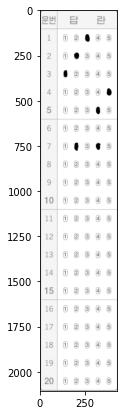

In [308]:
#slicing
x, y, w, h = cv2.boundingRect(roa[1])
print(x, y, w, h)
roi=gray[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

True

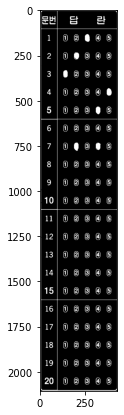

In [309]:
thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))